1. Zaimplementuj cross validation przez:

    podzielenie datasetu używając Kfold lub np.split,
    użycie for loop aby wyznaczyć score dla poszczególnych foldów,
    wyznaczenie score dla całego datasetu

2. Skorzystaj z cross_val_score dla:

    cv=3, cv=5, cv=10,
    porównaj czas wykonania cv z pkt powyżej (skorzystaj np z magic commands)

3. Porównaj wyniki (metryki) z pkt 1, 2 wraz z wynikami z zadania 02.

Rozwiązanie prześlij jako printscreen.

Nazwa pliku (bez polskich znaków):

Nazwisko_Imie_03_niestacj.jpg

In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LassoCV, Lasso

In [228]:
# load and return the diabetes dataset (regression).
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [229]:
# data, target assignments
X, y = diabetes.data, diabetes.target

# 1

In [230]:
# kfold instance
kf = KFold(n_splits = 3, shuffle = True, random_state = 1)

In [231]:
# split daata with kfold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("TRAIN:", train_index, "\n" "TEST:", test_index)

TRAIN: [  0   1   2   3   7   8   9  10  12  14  15  16  19  20  21  22  24  25
  26  28  30  32  33  34  35  36  37  38  42  43  44  45  48  49  50  51
  52  53  54  55  56  57  59  60  63  64  68  70  71  72  74  75  76  77
  79  83  84  86  87  88  91  94  96  97  99 100 103 104 105 108 109 110
 111 112 113 114 115 116 118 120 121 123 124 125 126 129 130 131 133 134
 135 136 137 138 140 141 142 143 144 145 147 148 149 150 151 152 153 154
 155 156 157 158 160 161 163 166 167 169 170 172 175 176 177 178 181 182
 183 184 187 188 190 193 194 195 196 198 199 200 201 202 203 204 205 209
 210 211 212 215 216 217 219 220 222 223 225 226 227 229 231 234 235 236
 237 238 239 240 241 243 244 245 247 248 250 252 253 254 255 259 261 262
 263 264 265 266 268 269 270 272 274 276 278 279 280 281 282 287 288 291
 295 296 297 298 300 301 302 303 305 306 308 309 312 313 316 317 319 321
 322 323 325 329 330 333 334 335 336 337 341 342 343 344 345 346 348 349
 350 352 354 355 356 357 358 360 361 362 363

In [232]:
# score for every fold
def score_by_fold():
    # lasso instance and parameters
    alphas = np.logspace(-4, -0.5, 30)
    lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
    k_fold = KFold(10)
    
    for k, (train, test) in enumerate(k_fold.split(X, y)):
        lasso_cv.fit(X[train], y[train])
        print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
              format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))

In [233]:
%time score_by_fold()

[fold 0] alpha: 0.07880, score: 0.52304
[fold 1] alpha: 0.05968, score: 0.24482
[fold 2] alpha: 0.00010, score: 0.35382
[fold 3] alpha: 0.04520, score: 0.60507
[fold 4] alpha: 0.05968, score: 0.27437
[fold 5] alpha: 0.00371, score: 0.62182
[fold 6] alpha: 0.00010, score: 0.41831
[fold 7] alpha: 0.03424, score: 0.43149
[fold 8] alpha: 0.04520, score: 0.42585
[fold 9] alpha: 0.00853, score: 0.68270
Wall time: 711 ms


In [234]:
# whole dataset score
def whole_score():
    return lasso_cv.score(X[test], y[test])

In [235]:
%time whole_score()

Wall time: 0 ns


0.6827010716027995

# 2

In [236]:
def my_cross_val():
    list = [3, 5, 10]
    lasso = Lasso()

    for n in list:
        print(cross_val_score(lasso, X, y, cv=n))
        print("Max: ", max(cross_val_score(lasso, X, y, cv=n)), "\n")

In [237]:
%time my_cross_val()

[0.34542985 0.34712314 0.36884726]
Max:  0.36884725706191346 

[0.28349047 0.35157959 0.3533813  0.33481474 0.36453281]
Max:  0.36453281428665396 

[0.37566102 0.10727689 0.30374655 0.38050755 0.22515853 0.41506179
 0.30380439 0.34876534 0.32262628 0.42874276]
Max:  0.4287427630907267 

Wall time: 123 ms


# 3

In [238]:
r2_score_dict = {
    # scores from 02_linear_regr
    "dummy regression": 0.0,
    "linear regression": 0.4033025232246107,
    "ridge": 0.4027277632830567,
    "lasoo": 0.40050373260020367,
    "ridgeCV": 0.4045745545779539,
    "lassoCV": 0.40050373260020367,
    # scores from 03_cross_valid
    "lasso_cv_kfold_10": 0.6827010716027995,
    "lasso_cross_val_10": 0.4287427630907267
}

In [239]:
r2_df = pd.DataFrame.from_dict(r2_score_dict, orient='index', columns=["value"])
sorted_r2_df = r2_df.sort_values(by=["value"])
sorted_r2_df

,value
dummy regression,0.000000
lasoo,0.400504
lassoCV,0.400504
ridge,0.402728
linear regression,0.403303
ridgeCV,0.404575
lasso_cross_val_10,0.428743
lasso_cv_kfold_10,0.682701


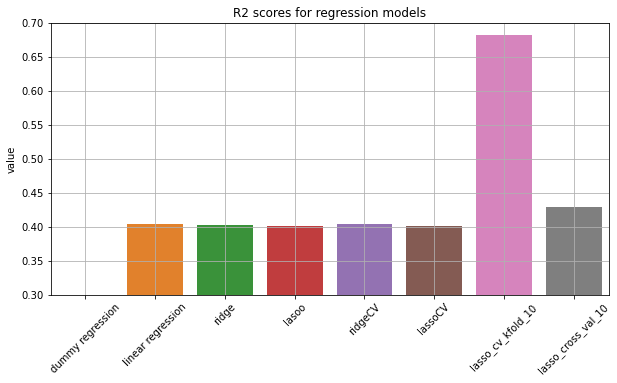

In [240]:
plt.figure(figsize=(10,5))
sns.barplot(x=r2_df.index, y=r2_df.value)
plt.ylim(0.3, 0.7)
plt.xticks(rotation=45)
plt.title("R2 scores for regression models")
plt.grid()